The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.99999088]
 [0.99999994]
 [0.99999992]
 [0.99999992]]


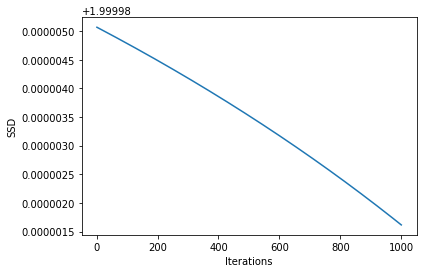

In [1]:
# Logic Operator

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input    = x
        self.neuron   = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1)                   # N neurons connected to output            
        self.y        = y
        self.output   = np.zeros(self.y.shape)                # instantiating the output

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)) 
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,
                            (2*(self.y - self.output)
                            * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,
                            (np.dot(2*(self.y - self.output)
                            * sigmoid_derivative(self.output),
                            self.weights2.T) * sigmoid_derivative(self.layer1)))

        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2


iterations = 1000
n_unit = 50

if __name__ == "__main__": 
    
    """Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
    
    Target = np.array([[0],[0],[0],[1]])"""
    
    Input = np.array([[0,0,0],
                      [0,1,1],
                      [1,0,1],
                      [1,1,0]])
    
    Target = np.array([[0],[1],[1],[0]])
               
    model = NeuralNetwork(Input, Target, n_unit)
    
    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))            # Objective(loss) function
                      

    Itr = np.linspace(1,len(SSD),len(SSD))    
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')

    print("The target values are:", Target)
    print("The predicted values are:", model.output)


In [ ]:
#Task 1 AND
#For 10-50 the error is still very large to get relevant predictions, therefore they will be wrong. 
#For 100-500 the error can still be reduced even though the predictions are correct. 
#For 500+ the error is much lower and the predictions are correct.
#Different number of iterations need to tested in order determine when the algorithm converges.
#We don't to do too few iterations so the algorithm will not converge and we don't to do too many so the algorithm takes a long time to train.

#Task 2 XOR
#For a 1000 iterations the model gets better predictions for the AND problem given that a single layer perceptron cannot solve the XOR problem.
#For 2-10 the results where improved and the error was almost 0, however, for 50 the classifier overfitted and the data was misclassified.

In [2]:
# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
tf.config.gpu.set_per_process_memory_fraction(0.3)
tf.config.gpu.set_per_process_memory_growth(True)

Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 50

model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer = SGD(),
              metrics=['binary_accuracy'])

model.fit(Input, Target, epochs = 5000, verbose=0)

print("The predicted class labels are:", model.predict(Input))

The predicted class labels are: [[0.48148227]
 [0.5354591 ]
 [0.51937497]
 [0.49328503]]


In [ ]:
#The difference between task 3 and task 2 is that in task 3 MSE is used as loss function and in the hidden layer Relu is used as activation function.
#In task 2 the model learned how to classify just one type of output, yet in task 3 it didn´t learn how to classify any of both outputs.

## Skin Images (task 6-7)

In [25]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

#image size
img_w, img_h = 100, 100 # Setting the width and heights of the images
data_path = '/Lab1/Skin/' # Path to data root. Inside this path,
                         #two subfolder are placed one for train data and one for test data.

#Create the data paths folders
train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

#Returns the names of the files in the path
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)

Reading: 0/1000  of train images
Reading: 200/1000  of train images
Reading: 400/1000  of train images
Reading: 600/1000  of train images
Reading: 800/1000  of train images
Reading: 0/200 of test images
Reading: 100/200 of test images


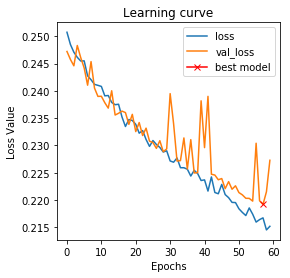

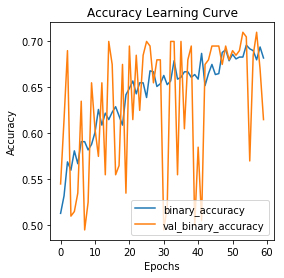

In [13]:
# MLP Example; Complete the code
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


#MLP model definition
def MLP(img_width,img_height, base):

    model = Sequential()
    model.add(Dense(base, input_dim=(img_width*img_height), activation='relu'))
    model.add(Dense(base//2, activation='relu'))
    model.add(Dense(base//4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

#init
img_width = 100
img_height = 100
base = 64

Input = np.reshape(x_train, (1000,10000))
Test_Input = np.reshape(x_test, (200,10000))
Target = y_train
Test_Target = y_test

#model call
model = MLP(img_width,img_height, base)

model.compile(loss='mean_squared_error',
                  optimizer = SGD(lr=0.001),
                  metrics=['binary_accuracy'])

#model execution
History = model.fit(Input, Target, epochs = 60, batch_size= 16, verbose=0, validation_data=(Test_Input,Test_Target))


#Training and Validation loss curves
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

#Train and test accuracy plot
plt.figure(figsize=(4,4))
plt.title("Accuracy Learning Curve")
plt.plot(History.history["binary_accuracy"], label="binary_accuracy")
plt.plot(History.history["val_binary_accuracy"], label="val_binary_accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();



In [ ]:
#Task 4: So the lower the learning rate the more stable the loss function and the training is.
#We tested different activation fcns and sigmoid gave us the best results.
#the highest learning rate has the highest loss rate and lowest accuracy for both training and test data.
#the lowest learning rate has the lowest loss rate and highest accuracy for training data -> overfitting the training data
#the middle learning rate has the lowest loss rate and highest accuracy for test data. -> best model 

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 40000)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 64)                2560064   
_________________________________________________________________
dense_59 (Dense)             (None, 1)               

Epoch 43/300
1000/1000 [==============================] - 0s 206us/sample - loss: 0.4391 - binary_accuracy: 0.8070 - val_loss: 0.4967 - val_binary_accuracy: 0.8150
Epoch 44/300
1000/1000 [==============================] - 0s 206us/sample - loss: 0.4285 - binary_accuracy: 0.8150 - val_loss: 0.4877 - val_binary_accuracy: 0.8250
Epoch 45/300
1000/1000 [==============================] - 0s 204us/sample - loss: 0.4230 - binary_accuracy: 0.8290 - val_loss: 0.4879 - val_binary_accuracy: 0.8100
Epoch 46/300
1000/1000 [==============================] - 0s 203us/sample - loss: 0.4204 - binary_accuracy: 0.8280 - val_loss: 0.4885 - val_binary_accuracy: 0.8200
Epoch 47/300
1000/1000 [==============================] - 0s 203us/sample - loss: 0.4265 - binary_accuracy: 0.8200 - val_loss: 0.4854 - val_binary_accuracy: 0.8200
Epoch 48/300
1000/1000 [==============================] - 0s 209us/sample - loss: 0.4147 - binary_accuracy: 0.8270 - val_loss: 0.4902 - val_binary_accuracy: 0.8050
Epoch 49/300
100

Epoch 93/300
1000/1000 [==============================] - 0s 204us/sample - loss: 0.2926 - binary_accuracy: 0.9000 - val_loss: 0.4966 - val_binary_accuracy: 0.8400
Epoch 94/300
1000/1000 [==============================] - 0s 206us/sample - loss: 0.2923 - binary_accuracy: 0.8910 - val_loss: 0.4974 - val_binary_accuracy: 0.8400
Epoch 95/300
1000/1000 [==============================] - 0s 209us/sample - loss: 0.2906 - binary_accuracy: 0.8950 - val_loss: 0.4988 - val_binary_accuracy: 0.8450
Epoch 96/300
1000/1000 [==============================] - 0s 205us/sample - loss: 0.2903 - binary_accuracy: 0.8880 - val_loss: 0.4955 - val_binary_accuracy: 0.8250
Epoch 97/300
1000/1000 [==============================] - 0s 205us/sample - loss: 0.2857 - binary_accuracy: 0.8970 - val_loss: 0.5003 - val_binary_accuracy: 0.8050
Epoch 98/300
1000/1000 [==============================] - 0s 209us/sample - loss: 0.2819 - binary_accuracy: 0.9020 - val_loss: 0.5169 - val_binary_accuracy: 0.8150
Epoch 99/300
100

Epoch 143/300
1000/1000 [==============================] - 0s 205us/sample - loss: 0.1896 - binary_accuracy: 0.9320 - val_loss: 0.5921 - val_binary_accuracy: 0.8050
Epoch 144/300
1000/1000 [==============================] - 0s 205us/sample - loss: 0.1854 - binary_accuracy: 0.9340 - val_loss: 0.5821 - val_binary_accuracy: 0.8000
Epoch 145/300
1000/1000 [==============================] - 0s 204us/sample - loss: 0.1887 - binary_accuracy: 0.9390 - val_loss: 0.5877 - val_binary_accuracy: 0.8000
Epoch 146/300
1000/1000 [==============================] - 0s 205us/sample - loss: 0.1860 - binary_accuracy: 0.9360 - val_loss: 0.5878 - val_binary_accuracy: 0.8000
Epoch 147/300
1000/1000 [==============================] - 0s 204us/sample - loss: 0.1753 - binary_accuracy: 0.9460 - val_loss: 0.5932 - val_binary_accuracy: 0.7950
Epoch 148/300
1000/1000 [==============================] - 0s 201us/sample - loss: 0.1824 - binary_accuracy: 0.9390 - val_loss: 0.5954 - val_binary_accuracy: 0.8100
Epoch 149/

Epoch 193/300
1000/1000 [==============================] - 0s 206us/sample - loss: 0.1137 - binary_accuracy: 0.9670 - val_loss: 0.6896 - val_binary_accuracy: 0.7950
Epoch 194/300
1000/1000 [==============================] - 0s 206us/sample - loss: 0.1100 - binary_accuracy: 0.9690 - val_loss: 0.6898 - val_binary_accuracy: 0.7900
Epoch 195/300
1000/1000 [==============================] - 0s 200us/sample - loss: 0.1096 - binary_accuracy: 0.9710 - val_loss: 0.6856 - val_binary_accuracy: 0.7900
Epoch 196/300
1000/1000 [==============================] - 0s 207us/sample - loss: 0.1059 - binary_accuracy: 0.9730 - val_loss: 0.6970 - val_binary_accuracy: 0.7950
Epoch 197/300
1000/1000 [==============================] - 0s 204us/sample - loss: 0.1069 - binary_accuracy: 0.9690 - val_loss: 0.6988 - val_binary_accuracy: 0.7900
Epoch 198/300
1000/1000 [==============================] - 0s 211us/sample - loss: 0.1028 - binary_accuracy: 0.9750 - val_loss: 0.6981 - val_binary_accuracy: 0.8000
Epoch 199/

Epoch 243/300
1000/1000 [==============================] - 0s 207us/sample - loss: 0.0633 - binary_accuracy: 0.9900 - val_loss: 0.8324 - val_binary_accuracy: 0.7850
Epoch 244/300
1000/1000 [==============================] - 0s 209us/sample - loss: 0.0591 - binary_accuracy: 0.9890 - val_loss: 0.8104 - val_binary_accuracy: 0.7800
Epoch 245/300
1000/1000 [==============================] - 0s 203us/sample - loss: 0.0577 - binary_accuracy: 0.9940 - val_loss: 0.8233 - val_binary_accuracy: 0.7900
Epoch 246/300
1000/1000 [==============================] - 0s 211us/sample - loss: 0.0582 - binary_accuracy: 0.9930 - val_loss: 0.8281 - val_binary_accuracy: 0.7900
Epoch 247/300
1000/1000 [==============================] - 0s 211us/sample - loss: 0.0563 - binary_accuracy: 0.9910 - val_loss: 0.8215 - val_binary_accuracy: 0.7850
Epoch 248/300
1000/1000 [==============================] - 0s 208us/sample - loss: 0.0552 - binary_accuracy: 0.9910 - val_loss: 0.8204 - val_binary_accuracy: 0.7850
Epoch 249/

Epoch 293/300
1000/1000 [==============================] - 0s 205us/sample - loss: 0.0325 - binary_accuracy: 0.9990 - val_loss: 0.9859 - val_binary_accuracy: 0.7750
Epoch 294/300
1000/1000 [==============================] - 0s 204us/sample - loss: 0.0364 - binary_accuracy: 0.9970 - val_loss: 0.9608 - val_binary_accuracy: 0.7850
Epoch 295/300
1000/1000 [==============================] - 0s 205us/sample - loss: 0.0343 - binary_accuracy: 0.9970 - val_loss: 0.9498 - val_binary_accuracy: 0.7800
Epoch 296/300
1000/1000 [==============================] - 0s 203us/sample - loss: 0.0287 - binary_accuracy: 0.9990 - val_loss: 0.9454 - val_binary_accuracy: 0.7850
Epoch 297/300
1000/1000 [==============================] - 0s 203us/sample - loss: 0.0328 - binary_accuracy: 0.9980 - val_loss: 0.9495 - val_binary_accuracy: 0.7850
Epoch 298/300
1000/1000 [==============================] - 0s 202us/sample - loss: 0.0291 - binary_accuracy: 0.9980 - val_loss: 0.9569 - val_binary_accuracy: 0.7850
Epoch 299/

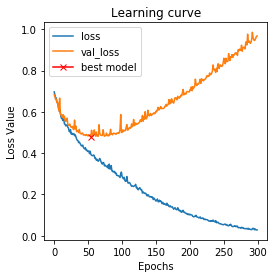

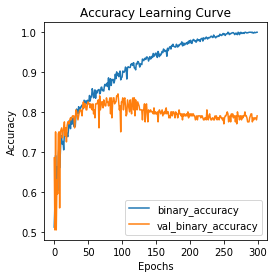

In [33]:
# LeNet Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
#Model definition
def model(img_ch, img_width, img_height):
    Base = 32
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    return model

#init
img_width = 100
img_height = 100
img_ch = 1

Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test

#Model call
model = model(img_ch,img_width,img_height)

model.compile(loss='binary_crossentropy',
                  optimizer = Adam(lr=0.0001),
                  metrics=['binary_accuracy'])

#Model execution
History = model.fit(Input, Target, epochs = 300, batch_size= 50, verbose=1, 
                  validation_data=(Test_Input, Test_Target))

print(History.history.keys())
#Training vs Validation plot
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

#Train and test accuracy plot
plt.figure(figsize=(4,4))
plt.title("Accuracy Learning Curve")
plt.plot(History.history["binary_accuracy"], label="binary_accuracy")
plt.plot(History.history["val_binary_accuracy"], label="val_binary_accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(); 

In [32]:
#5b) The accuracy is higher for both training and test set with 80 epochs because the algorithm has more iterations and time to train and converge
#5c)Less features less accuracy and higher loss fcn
#5d) Higher learning rate with less features and 80 epochs resulted in higher accuracy and lower loss fcn compared to previous learning rate
#5e) the role of the first two conv-layers is feature extraction 
#5f) the role of the last two dense-layers is to perform classification
#5g) in MLP you don't really have feature extraction. In leNet the position of the pixels are of importance and the information is not lost as is the case with mlp
#5h) Depending on the performed task and type of output we want to obtain 

In [1]:
#Data loader for AlexNet

import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

#init image dimensions
img_w, img_h = 128, 128                                # Setting the width and heights of the images
data_path = '/Lab1/Skin/'           # Path to data root. Inside this path,
                                                        #two subfolder are placed one for train data and one for test data.

#Creating data path
train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

#Listing all file names in the path
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/1000  of train images
Reading: 200/1000  of train images
Reading: 400/1000  of train images
Reading: 600/1000  of train images
Reading: 800/1000  of train images
Reading: 0/200 of test images
Reading: 100/200 of test images


In [3]:
# AlexNet Model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

#Model definition
def model(img_ch, img_width, img_height):
    Base = 32
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))


    model.add(Dense(64))
    model.add(Activation('relu'))


    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()   
    return model

#init
img_width = 128
img_height = 128
img_ch = 1

Input = x_train
Test_Input = x_test
#y_test[y_test == 0] = -1
#y_train[y_train == 0] = -1
Target = y_train
Test_Target = y_test

#Model call
model1 = model(img_ch,img_width,img_height)

model1.compile(loss='binary_crossentropy',
                  optimizer = Adam(lr=0.001),
                  metrics=['binary_accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)      

Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6984 - binary_accuracy: 0.4870 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 2/100
1000/1000 [==============================] - 1s 667us/sample - loss: 0.6934 - binary_accuracy: 0.4820 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 3/100
1000/1000 [==============================] - 1s 657us/sample - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 4/100
1000/1000 [==============================] - 1s 664us/sample - loss: 0.6932 - binary_accuracy: 0.4820 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/100
1000/1000 [==============================] - 1s 656us/sample - loss: 0.6932 - binary_accuracy: 0.4880 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 6/100
1000/1000 [==============================] - 1s 663us/sample - loss: 0.6932 - binary_accuracy: 0.4980 - val_loss: 0.6932 - val_b

Epoch 51/100
1000/1000 [==============================] - 1s 670us/sample - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 52/100
1000/1000 [==============================] - 1s 677us/sample - loss: 0.6932 - binary_accuracy: 0.4920 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 53/100
1000/1000 [==============================] - 1s 665us/sample - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 54/100
1000/1000 [==============================] - 1s 673us/sample - loss: 0.6932 - binary_accuracy: 0.4660 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 55/100
1000/1000 [==============================] - 1s 679us/sample - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 56/100
1000/1000 [==============================] - 1s 655us/sample - loss: 0.6932 - binary_accuracy: 0.4860 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 57/100
100

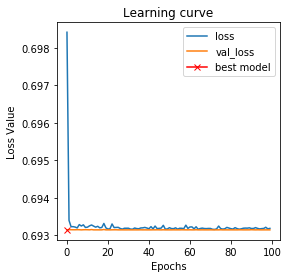

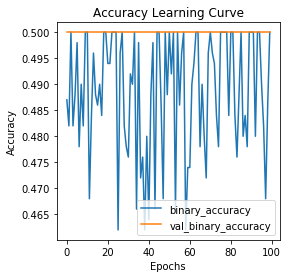

In [4]:
#AlexNet Execution
History = model1.fit(Input, Target, epochs = 100, batch_size=16, verbose=1,
                     validation_data=(x_test, y_test))

#Training vs Validation Learning loss 
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

#Train and test accuracy plot
plt.figure(figsize=(4,4))
plt.title("Accuracy Learning Curve")
plt.plot(History.history["binary_accuracy"], label="binary_accuracy")
plt.plot(History.history["val_binary_accuracy"], label="val_binary_accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(); 


In [ ]:
#task6
#A) the model converges and has higher accuracy on training and test data compared to lenet
#B) The lower the base is the worse the accuracy get because we are looking at less features
#C) The training accuracy has gotten worse while the test accuracy has gotten higher, this is expected because we consider a higher number of data in the batch than before
#D)

In [52]:
#VGG Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


#Model definition
def model(img_ch,img_width,img_height):


    model = Sequential([
    Conv2D(64, (3, 3), input_shape=(img_width,img_height,img_ch), padding= 'same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

    model.summary()
    return model

# init
img_width = 128
img_height = 128
img_ch = 1


#Call the model
model1 = model(img_ch,img_width,img_height)

# Compile the model
model1.compile(loss='binary_crossentropy',
                  optimizer = SGD(lr=0.01),
                  metrics=['binary_accuracy'])



Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 32, 32, 256)     

In [ ]:
#VGG Execution
#input data
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test

History = model1.fit(Input, Target, epochs = 220, batch_size=36, verbose=1,
                     validation_data=(x_test, y_test))


#Training vs Validation loss curve
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

#Train and test accuracy plot
plt.figure(figsize=(4,4))
plt.title("Accuracy Learning Curve")
plt.plot(History.history["binary_accuracy"], label="binary_accuracy")
plt.plot(History.history["val_binary_accuracy"], label="val_binary_accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(); 


Train on 1000 samples, validate on 200 samples
Epoch 1/220
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.6932 - binary_accuracy: 0.5030 - val_loss: 0.6931 - val_binary_accuracy: 0.7450
Epoch 2/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6932 - binary_accuracy: 0.4950 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6932 - binary_accuracy: 0.4840 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6931 - binary_accuracy: 0.4930 - val_loss: 0.6930 - val_binary_accuracy: 0.5000
Epoch 5/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6932 - binary_accuracy: 0.4890 - val_loss: 0.6930 - val_binary_accuracy: 0.5000
Epoch 6/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6931 - binary_accuracy: 0.4920 - val_loss: 0.6930 - val_binary_accu

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6918 - binary_accuracy: 0.5640 - val_loss: 0.6912 - val_binary_accuracy: 0.5600
Epoch 102/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6918 - binary_accuracy: 0.5650 - val_loss: 0.6911 - val_binary_accuracy: 0.5400
Epoch 103/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6916 - binary_accuracy: 0.5500 - val_loss: 0.6917 - val_binary_accuracy: 0.5100
Epoch 104/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6916 - binary_accuracy: 0.5600 - val_loss: 0.6922 - val_binary_accuracy: 0.5000
Epoch 105/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6917 - binary_accuracy: 0.5350 - val_loss: 0.6909 - val_binary_accuracy: 0.5450
Epoch 106/220
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6912 - binary_accuracy: 0.5490 - val_loss: 0.6907 - val_binary_accuracy: 0.6600
Epoch 107/220
1000/1000 [===========

### Bone Images (task 8-9)

In [ ]:
#Task 8

#Data loader fractured bone classification
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize


#init
img_w, img_h = 128, 128                                # Setting the width and heights of the images
data_path = '/Lab1/Bone/'  


# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'AFF', 'NFF')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'AFF', 'NFF')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label


#Creating the path                         
train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

#Listing of the file names in the directory
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)


#Calls
x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/1072  of train images


In [ ]:
#Prove that the data is loaded and pre-processed in the right way
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[3,:,:,0]/255.)
print(y_test)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                262160    
_________________________________________________________________
dense_27 (Dense)             (None, 1)               

Epoch 94/100
857/857 [==============================] - 0s 386us/sample - loss: 0.0258 - binary_accuracy: 0.9977 - val_loss: 0.2002 - val_binary_accuracy: 0.9535
Epoch 95/100
857/857 [==============================] - 0s 356us/sample - loss: 0.0254 - binary_accuracy: 0.9977 - val_loss: 0.1576 - val_binary_accuracy: 0.9488
Epoch 96/100
857/857 [==============================] - 0s 369us/sample - loss: 0.0251 - binary_accuracy: 0.9977 - val_loss: 0.1768 - val_binary_accuracy: 0.9628
Epoch 97/100
857/857 [==============================] - 0s 360us/sample - loss: 0.0248 - binary_accuracy: 0.9977 - val_loss: 0.1931 - val_binary_accuracy: 0.9442
Epoch 98/100
857/857 [==============================] - 0s 367us/sample - loss: 0.0244 - binary_accuracy: 0.9977 - val_loss: 0.1579 - val_binary_accuracy: 0.9581
Epoch 99/100
857/857 [==============================] - 0s 354us/sample - loss: 0.0241 - binary_accuracy: 0.9977 - val_loss: 0.1633 - val_binary_accuracy: 0.9488
Epoch 100/100
140/140 [=====

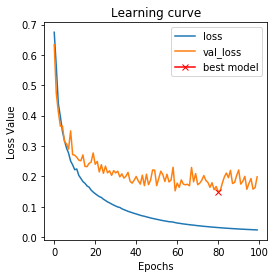

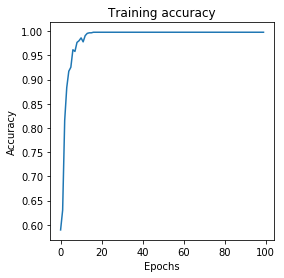

In [21]:
#LeNet for bone images
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD,Adam, Adadelta,RMSprop
import matplotlib.pyplot as plt
%matplotlib inline

#Model definition
def model(img_ch, img_width, img_height):
    Base = 8
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    return model

#init
img_width = 128
img_height = 128
img_ch = 1

Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test

#Model creation
model = model(img_ch,img_width,img_height)
#Model compilation
model.compile(loss='binary_crossentropy',
                  optimizer = Adam(lr=0.001),
                  metrics=['binary_accuracy'])
#Model fitting
History = model.fit(Input, Target, epochs = 100, batch_size= 16, verbose=1, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(Test_Input,Test_Target,batch_size= 8, verbose=1)
print("The predicted class labels are:", model.predict(Input), test_loss, test_accuracy)
    

#Results
#Training vs Validation Training loss curve
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

#Training accuracy evolution
plt.figure(figsize=(4,4))
plt.title("Training accuracy")
plt.plot(History.history["binary_accuracy"], label="binary_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

#Test Metrics
print('The test accuracy is: ', test_accuracy,' and the test loss is: ',test_loss,'.')


In [25]:
#Alexnet model

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

#Model definition
def model(img_ch, img_width, img_height):
    Base = 32
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))


    model.add(Dense(64))
    model.add(Activation('relu'))


    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()   
    return model

#init
img_width = 128
img_height = 128
img_ch = 1

Input = x_train
Test_Input = x_test
#y_test[y_test == 0] = -1
#y_train[y_train == 0] = -1
Target = y_train
Test_Target = y_test

#Model call
model1 = model(img_ch,img_width,img_height)

model1.compile(loss='binary_crossentropy',
                  optimizer = Adam(lr=0.0001),
                  metrics=['binary_accuracy'])



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_32 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_33 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 32, 32, 128)     

Train on 1072 samples, validate on 140 samples
Epoch 1/15
1072/1072 [==============================] - 1s 945us/sample - loss: 0.6743 - binary_accuracy: 0.6026 - val_loss: 0.6974 - val_binary_accuracy: 0.5143
Epoch 2/15
1072/1072 [==============================] - 1s 642us/sample - loss: 0.5099 - binary_accuracy: 0.7640 - val_loss: 0.3421 - val_binary_accuracy: 0.8786
Epoch 3/15
1072/1072 [==============================] - 1s 639us/sample - loss: 0.2464 - binary_accuracy: 0.9067 - val_loss: 0.2295 - val_binary_accuracy: 0.9286
Epoch 4/15
1072/1072 [==============================] - 1s 646us/sample - loss: 0.1847 - binary_accuracy: 0.9282 - val_loss: 0.2136 - val_binary_accuracy: 0.9214
Epoch 5/15
1072/1072 [==============================] - 1s 641us/sample - loss: 0.1407 - binary_accuracy: 0.9403 - val_loss: 0.1944 - val_binary_accuracy: 0.9286
Epoch 6/15
1072/1072 [==============================] - 1s 648us/sample - loss: 0.1079 - binary_accuracy: 0.9590 - val_loss: 0.2102 - val_binar

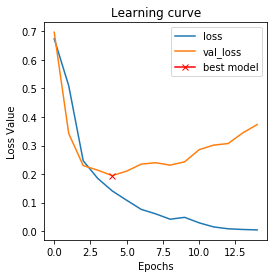

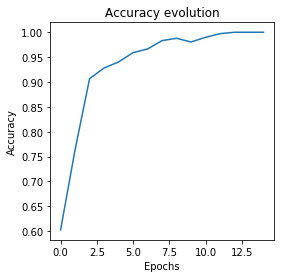

In [26]:
#AlexNet Execution

#Model execution
History = model1.fit(Input, Target, epochs = 15, batch_size=16, verbose=1,
                     validation_data=(x_test, y_test))
  
#Training vs Validation learning loss curve
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

#Train accuracy evolution
plt.figure(figsize=(4,4))
plt.title("Accuracy evolution")
plt.plot(History.history["binary_accuracy"], label="binary_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


#Test Metrics
print('The test accuracy is: ', test_accuracy,' and the test loss is: ',test_loss,'.')

In [29]:
#VGG model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


#Model definition
def model(img_ch,img_width,img_height):

    model = Sequential([
    Conv2D(64, (3, 3), input_shape=(img_width,img_height,img_ch), padding= 'same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

    model.summary()
    return model

# Compile the model

img_width = 128
img_height = 128
img_ch = 1


#Call the model
model1 = model(img_ch,img_width,img_height)

# Compile the model
model1.compile(loss='binary_crossentropy',
                  optimizer = SGD(lr=0.001),
                  metrics=['binary_accuracy'])



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 32, 32, 256)     

Train on 1072 samples, validate on 140 samples
Epoch 1/20
1072/1072 [==============================] - 3s 3ms/sample - loss: 0.6929 - binary_accuracy: 0.5774 - val_loss: 0.6931 - val_binary_accuracy: 0.5071
Epoch 2/20
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6922 - binary_accuracy: 0.5979 - val_loss: 0.6931 - val_binary_accuracy: 0.5071
Epoch 3/20
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6915 - binary_accuracy: 0.5979 - val_loss: 0.6930 - val_binary_accuracy: 0.5071
Epoch 4/20
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6909 - binary_accuracy: 0.5979 - val_loss: 0.6930 - val_binary_accuracy: 0.5071
Epoch 5/20
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6903 - binary_accuracy: 0.5979 - val_loss: 0.6930 - val_binary_accuracy: 0.5071
Epoch 6/20
1072/1072 [==============================] - 2s 2ms/sample - loss: 0.6897 - binary_accuracy: 0.5979 - val_loss: 0.6930 - val_binary_accuracy: 

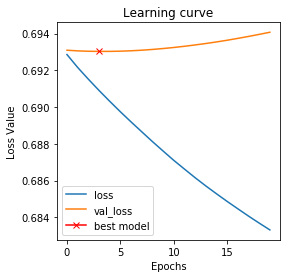

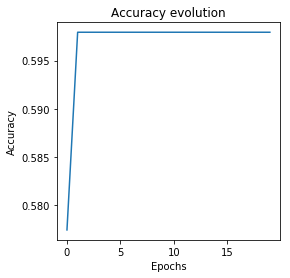

In [30]:
#VGG Execution

#init
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test

#Model execution
History = model1.fit(Input, Target, epochs = 20, batch_size=36, verbose=1,
                     validation_data=(x_test, y_test))

#Training vs Validation learning loss curve
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

#Train Accuracy evolution
plt.figure(figsize=(4,4))
plt.title("Accuracy evolution")
plt.plot(History.history["binary_accuracy"], label="accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


#Test Metrics
print('The test accuracy is: ', test_accuracy,' and the test loss is: ',test_loss,'.')


# X-Ray Images (Bonus Task)

In [1]:
# Data Loader for X-Ray Images Bonus Task
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

#image size
img_w, img_h = 128, 128 # Setting the width and heights of the images
data_path = '/Lab1/X_ray/' # Path to data root. Inside this path,
                         #two subfolder are placed one for train data and one for test data.

#Create the data paths folders
train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

#Returns the names of the files in the path
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2, pat3, pat4, pat5, pat6, pat7, pat8, pat9):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        elif pat3 in im_name:
            Label = np.array([2])
        elif pat4 in im_name:
            Label = np.array([3])
        elif pat5 in im_name:
            Label = np.array([4])
        elif pat6 in im_name:
            Label = np.array([5])
        elif pat7 in im_name:
            Label = np.array([6])
        elif pat8 in im_name:
            Label = np.array([7])
        elif pat9 in im_name:
            Label = np.array([8])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'C1', 'C2', 'C3','C4','C5','C6','C7','C8', 'C9')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'C1', 'C2', 'C3','C4','C5','C6','C7','C8', 'C9')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/5780  of train images
Reading: 200/5780  of train images
Reading: 400/5780  of train images
Reading: 600/5780  of train images
Reading: 800/5780  of train images
Reading: 1000/5780  of train images
Reading: 1200/5780  of train images
Reading: 1400/5780  of train images
Reading: 1600/5780  of train images
Reading: 1800/5780  of train images
Reading: 2000/5780  of train images
Reading: 2200/5780  of train images
Reading: 2400/5780  of train images
Reading: 2600/5780  of train images
Reading: 2800/5780  of train images
Reading: 3000/5780  of train images
Reading: 3200/5780  of train images
Reading: 3400/5780  of train images
Reading: 3600/5780  of train images
Reading: 3800/5780  of train images
Reading: 4000/5780  of train images
Reading: 4200/5780  of train images
Reading: 4400/5780  of train images
Reading: 4600/5780  of train images
Reading: 4800/5780  of train images
Reading: 5000/5780  of train images
Reading: 5200/5780  of train images
Reading: 5400/5780  of train images

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                262160    
_________________________________________________________________
dense_11 (Dense)             (None, 9)                

Epoch 47/100
5780/5780 [==============================] - 1s 161us/sample - loss: 0.1838 - accuracy: 0.9405 - val_loss: 0.3729 - val_accuracy: 0.8956
Epoch 48/100
5780/5780 [==============================] - 1s 166us/sample - loss: 0.1832 - accuracy: 0.9377 - val_loss: 0.3472 - val_accuracy: 0.8956
Epoch 49/100
5780/5780 [==============================] - 1s 170us/sample - loss: 0.1899 - accuracy: 0.9367 - val_loss: 0.3545 - val_accuracy: 0.9022
Epoch 50/100
5780/5780 [==============================] - 1s 162us/sample - loss: 0.1863 - accuracy: 0.9410 - val_loss: 0.3647 - val_accuracy: 0.8956
Epoch 51/100
5780/5780 [==============================] - 1s 170us/sample - loss: 0.1839 - accuracy: 0.9377 - val_loss: 0.4190 - val_accuracy: 0.8756
Epoch 52/100
5780/5780 [==============================] - 1s 164us/sample - loss: 0.1792 - accuracy: 0.9388 - val_loss: 0.4191 - val_accuracy: 0.8800
Epoch 53/100
5780/5780 [==============================] - 1s 165us/sample - loss: 0.1787 - accuracy:

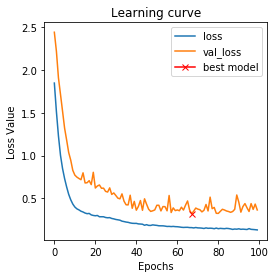

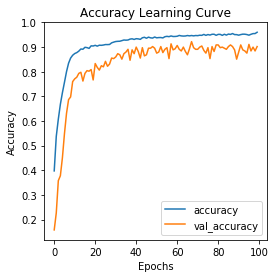

In [7]:
#LeNet for X-Ray images
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD,Adam, Adadelta,RMSprop
import matplotlib.pyplot as plt
%matplotlib inline

#Model definition
def model(img_ch, img_width, img_height):
    Base = 8
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(9, activation='softmax')) #softmax works best for multi-class problems
    model.summary()
    
    return model

#init
img_width = 128
img_height = 128
img_ch = 1

Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test

#Model creation
model = model(img_ch,img_width,img_height)
#Model compilation
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer = SGD(lr=0.001),
                  metrics=['accuracy'])
#our targets are integers so we use sparse_categorical_crossentropy
#Model fitting
History = model.fit(Input, Target, epochs = 100, batch_size= 32, verbose=1, validation_data=(Test_Input,Test_Target))

    
#Results
#Training vs Validation Training loss curve
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 


#Train and test accuracy plot
plt.figure(figsize=(4,4))
plt.title("Accuracy Learning Curve")
plt.plot(History.history["accuracy"], label="accuracy")
plt.plot(History.history["val_accuracy"], label="val_accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_56 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_57 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 128)     

5780/5780 [==============================] - 3s 478us/sample - loss: 0.0087 - accuracy: 0.9964 - val_loss: 0.2476 - val_accuracy: 0.9533
Epoch 36/80
5780/5780 [==============================] - 3s 479us/sample - loss: 0.0305 - accuracy: 0.9865 - val_loss: 0.2281 - val_accuracy: 0.9467
Epoch 37/80
5780/5780 [==============================] - 3s 470us/sample - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.3446 - val_accuracy: 0.9422
Epoch 38/80
5780/5780 [==============================] - 3s 479us/sample - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.3188 - val_accuracy: 0.9422
Epoch 39/80
5780/5780 [==============================] - 3s 479us/sample - loss: 9.9197e-04 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy: 0.9422
Epoch 40/80
5780/5780 [==============================] - 3s 473us/sample - loss: 5.0729e-04 - accuracy: 1.0000 - val_loss: 0.3679 - val_accuracy: 0.9422
Epoch 41/80
5780/5780 [==============================] - 3s 471us/sample - loss: 3.9886e-04 - accuracy: 1.0000

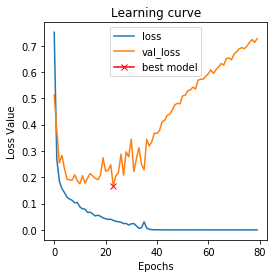

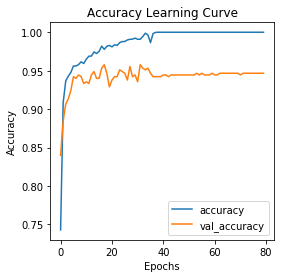

In [15]:
#Alexnet model for X-Ray images

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

#Model definition
def model(img_ch, img_width, img_height):
    Base = 32
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))


    model.add(Dense(64))
    model.add(Activation('relu'))


    model.add(Dense(9))
    model.add(Activation('softmax'))

    model.summary()   
    return model

#init
img_width = 128
img_height = 128
img_ch = 1

Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test

#Model call
model1 = model(img_ch,img_width,img_height)

model1.compile(loss='sparse_categorical_crossentropy',
                  optimizer = Adam(lr=0.0001),
                  metrics=['accuracy'])
#Model execution
History = model1.fit(Input, Target, epochs = 80, batch_size=32, verbose=1,
                     validation_data=(x_test, y_test))
  
#Results
#Training vs Validation Training loss curve
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 


#Train and test accuracy plot
plt.figure(figsize=(4,4))
plt.title("Accuracy Learning Curve")
plt.plot(History.history["accuracy"], label="accuracy")
plt.plot(History.history["val_accuracy"], label="val_accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [ ]:
#VGG model for X-Ray Images

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


#Model definition
def model(img_ch,img_width,img_height):

    model = Sequential([
    Conv2D(64, (3, 3), input_shape=(img_width,img_height,img_ch), padding= 'same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(9, activation='softmax')
    ])

    model.summary()
    return model

# Compile the model

img_width = 128
img_height = 128
img_ch = 1


#Call the model
model1 = model(img_ch,img_width,img_height)

model1.compile(loss='sparse_categorical_crossentropy',
                  optimizer = Adam(lr=0.001),
                  metrics=['accuracy'])
#Model execution
History = model1.fit(Input, Target, epochs = 15, batch_size=16, verbose=1,
                     validation_data=(x_test, y_test))
  
#Results
#Training vs Validation Training loss curve
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 


#Train and test accuracy plot
plt.figure(figsize=(4,4))
plt.title("Accuracy Learning Curve")
plt.plot(History.history["accuracy"], label="accuracy")
plt.plot(History.history["val_accuracy"], label="val_accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();



Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 256)     